# **Sentiment Analysis Using Yelp Reviews Dataset**

## **Binary Model : 1 = Positive, 0 = Negative**
#### Using TF-IDF as Vectorization Technique

JIRA Link: https://aml-2304-final-project.atlassian.net/jira/software/projects/KAN/boards/1 

Github Link: https://github.com/dars180602/Sentiment-Analysis-Interface

### **Data Loading**

In [33]:
# Importing necessary Libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Function to create a DataFrame from a JSON file
def create_dataframe_from_json(filename):
    # Initialize an empty list to store the data
    data = []
    
    # Open the JSON file in read mode with UTF-8 encoding
    with open(filename, 'r', encoding='utf-8') as file:
        # Iterate through each line in the file
        for line in file:
            # Parse each line as JSON and append it to the data list
            data.append(json.loads(line))
    
    # Convert the list of JSON objects into a DataFrame
    return pd.DataFrame(data)

# Call the create_dataframe_from_json function to create DataFrames
# from the JSON files for reviews and businesses
review_df = create_dataframe_from_json('C:/Users/ndhu2/Desktop/Term_3/6_Natural Language Processing/Project/yelp_dataset/yelp_academic_dataset_review.json')
business_df = create_dataframe_from_json('C:/Users/ndhu2/Desktop/Term_3/6_Natural Language Processing/Project/yelp_dataset/yelp_academic_dataset_business.json')

### **Data Preprocessing**

In [13]:
# Merge the two dataframes on the 'business_id' column
merged_df = pd.merge(review_df, business_df, on='business_id', how='left')

# Check the resulting dataframe
print(merged_df.head(10))

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
5  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
6  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   
7  _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   
8  ZKvDG2sBvHVdF5oBNUOpAQ  wSTuiTk-sKNdcFyprzZAjg  B5XSoSG3SfvQGtKEGQ1tSQ   
9  pUycOfUwM8vqX7KjRRhUEA  59MxRhNVhU9MYndMkz0wtw  gebiRewfieSdtt17PTW6Zg   

   stars_x  useful  funny  cool  \
0      3.0       0      0     0   
1      5.0       1      0     1   
2      3.0       0      0     0   
3      5.0  

In [14]:
# Get the dimensions (number of rows and columns) of the DataFrame merged_df
merged_df.shape

(6990280, 22)

In [16]:
# Get the data types of columns in the DataFrame merged_df
merged_df.dtypes

review_id        object
user_id          object
business_id      object
stars_x         float64
useful            int64
funny             int64
cool              int64
text             object
date             object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars_y         float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [15]:
# Display the first 10 rows of the DataFrame merged_df
merged_df.head(10)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,PA,19147,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,The Voodoo Bone Lady Tours,...,LA,70170,29.952030,-90.070334,4.5,359,1,{'GoodForKids': 'True'},"Supernatural Readings, Tours, Hotels & Travel,...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Fries Rebellion,...,PA,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,Los Padres National Forest,...,CA,93105,34.597239,-119.510772,4.5,13,1,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Parks, Active Life",None
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'}


In [18]:
# Drop unnecessary features
df = merged_df[['text', 'stars_x', 'categories','state','name']]

In [19]:
# Check the resulting dataframe
df.head(10)

,text,stars_x,categories,state,name
0,"If you decide to eat here, just be aware it is...",3.0,"Restaurants, Breakfast & Brunch, Food, Juice B...",PA,Turning Point of North Wales
1,I've taken a lot of spin classes over the year...,5.0,"Active Life, Cycling Classes, Trainers, Gyms, ...",PA,Body Cycle Spinning Studio
2,Family diner. Had the buffet. Eclectic assortm...,3.0,"Restaurants, Breakfast & Brunch",AZ,Kettle Restaurant
3,"Wow! Yummy, different, delicious. Our favo...",5.0,"Halal, Pakistani, Restaurants, Indian",PA,Zaika
4,Cute interior and owner (?) gave us tour of up...,4.0,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",LA,Melt
5,I am a long term frequent customer of this est...,1.0,"Mediterranean, Restaurants, Seafood, Greek",PA,Dmitri's
6,Loved this tour! I grabbed a groupon and the p...,5.0,"Supernatural Readings, Tours, Hotels & Travel,...",LA,The Voodoo Bone Lady Tours
7,Amazingly amazing wings and homemade bleu chee...,5.0,"Beer Bar, Bars, American (New), Gastropubs, Re...",PA,Fries Rebellion
8,This easter instead of going to Lopez Lake we ...,3.0,"Parks, Active Life",CA,Los Padres National Forest
9,Had a party of 6 here for hibachi. Our waitres...,3.0,"Steakhouses, Sushi Bars, Restaurants, Japanese",CA,Hibachi Steak House & Sushi Bar


In [21]:
# Display the number of records with missing values
missing_values_count = df.isnull().sum()
print("Number of records with missing values:")
print(missing_values_count)

# Display the number of duplicate records
duplicate_records_count = df.duplicated().sum()
print("\nNumber of duplicate records:")
print(duplicate_records_count)

# Display the number of records before any cleaning
total_records_before_cleaning = len(df)
print("\nTotal number of records before cleaning:", total_records_before_cleaning)


Number of records with missing values:
text            0
stars_x         0
categories    689
state           0
name            0
dtype: int64

Number of duplicate records:
12007

Total number of records before cleaning: 6990280


In [22]:
# Find duplicate records
duplicate_mask = df.duplicated(keep=False)
duplicate_records = df[duplicate_mask]

In [25]:
# Display the first 20 rows of the DataFrame duplicate_records
duplicate_records.head(20)

,text,stars_x,categories,state,name
749,I've always had good experiences here. The foo...,4.0,"Restaurants, American (New)",AZ,Nox Kitchen + Cocktails
1283,Great food... Love the Fish tacos & Nachos are...,5.0,"Seafood, American (Traditional), Music Venues,...",FL,Sam's Beach Bar
2244,We were back last night for the second time: a...,5.0,"Restaurants, Nightlife, Japanese, Bars",CA,Yoichi's
2855,I ate like a Queen! A breakfeast Queen- and I...,5.0,"Restaurants, Southern, Cajun/Creole, Seafood, ...",LA,Mena's Palace
3311,We are visiting in Philadelphia from Californi...,5.0,"Active Life, Beer Gardens, Grocery, Middle Eas...",PA,Suraya
3572,While I was moving in and had all my stuff on ...,1.0,"Home Services, Real Estate, Apartments",FL,Egret's Landing Apartments
4094,I have no idea what these people are talking a...,3.0,"Restaurants, New Mexican Cuisine, Mexican",LA,Burritos Grill Mexican Fresh Cuisine
4391,This Wendy's is a good location. Open 24 hours...,4.0,"Hot Dogs, American (New), Food, Burgers, Fast ...",NJ,Wendy's
4673,The person next door reported a leak coming fr...,5.0,"Home Services, Plumbing",FL,Tom Shell Plumbing
4873,The wash was very average and very little atte...,3.0,"Auto Detailing, Car Wash, Automotive",FL,Mike's Auto Detailing


After identifying that the duplicated records appear to be regular or normal entries, we concluded that their presence is likely the result of an error during data handling or uploading. Given that they do not provide any additional information, keeping them in the dataset is unlikely to have a positive impact on model performance. Therefore, we plan to remove these duplicate records as part of the data cleaning process.

In [26]:
# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display the number of records after cleaning
total_records_after_cleaning = len(df)
print("\nTotal number of records after cleaning:", total_records_after_cleaning)

C:\Users\ndhu2\AppData\Local\Temp\ipykernel_2900\611006536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)



Total number of records after cleaning: 6977585


C:\Users\ndhu2\AppData\Local\Temp\ipykernel_2900\611006536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### **Initial Exploratory Data Analysis**

In [28]:
# Generate descriptive statistics for all columns, including both numeric and categorical data,
# in the DataFrame df
df.describe(include='all')

,text,stars_x,categories,state,name
count,6977585,6.977585e+06,6977585,6977585,6977585
unique,6973440,NaN,83160,27,114026
top,DO NOT PARK HERE!\nthey are too quick to boot ...,NaN,"Mexican, Restaurants",PA,Starbucks
freq,18,NaN,54841,1596380,21532
mean,NaN,3.748519e+00,NaN,NaN,NaN
std,NaN,1.478515e+00,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,3.000000e+00,NaN,NaN,NaN
50%,NaN,4.000000e+00,NaN,NaN,NaN
75%,NaN,5.000000e+00,NaN,NaN,NaN


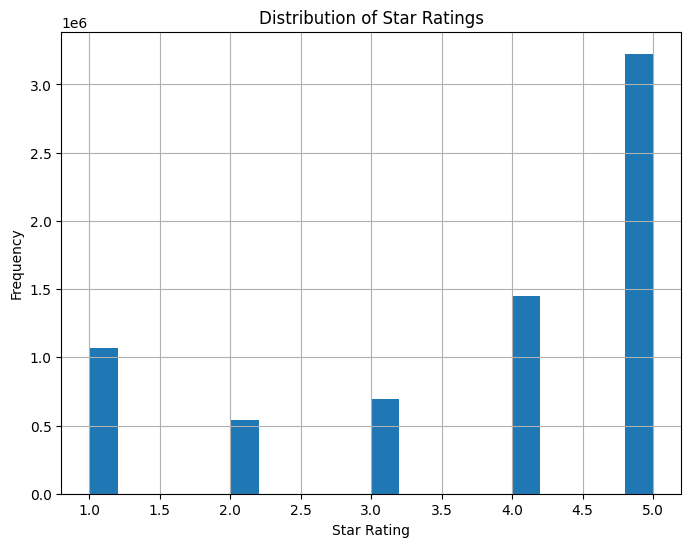

In [30]:
# Stars Distribution Analysis
df['stars_x'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

As the dataset exhibits an uneven distribution of star ratings, developing a model to predict or identify the sentiment of reviews poses a challenge. The significant difference between the majority class (5 stars) and the minority class (2 stars) may introduce bias during model training. To mitigate this issue, we plan to implement undersampling, leveraging the abundance of available data.

In [31]:
# Undersampling Process
# Identify the size of the 2-stars category
stars_2_count = df[df['stars_x'] == 2].shape[0]

# Randomly sample records from the majority categories to match the size of the 2-stars category
u_df = pd.concat([
    df[df['stars_x'] == 5].sample(stars_2_count, replace=False),
    df[df['stars_x'] == 4].sample(stars_2_count, replace=False),
    df[df['stars_x'] == 3].sample(stars_2_count, replace=False),
    df[df['stars_x'] == 2],  # Include all records from the 2-stars category
    df[df['stars_x'] == 1].sample(stars_2_count, replace=False)
])

In [32]:
# Get the dimensions (number of rows and columns) of the DataFrame u_df
u_df.shape

(2717820, 5)

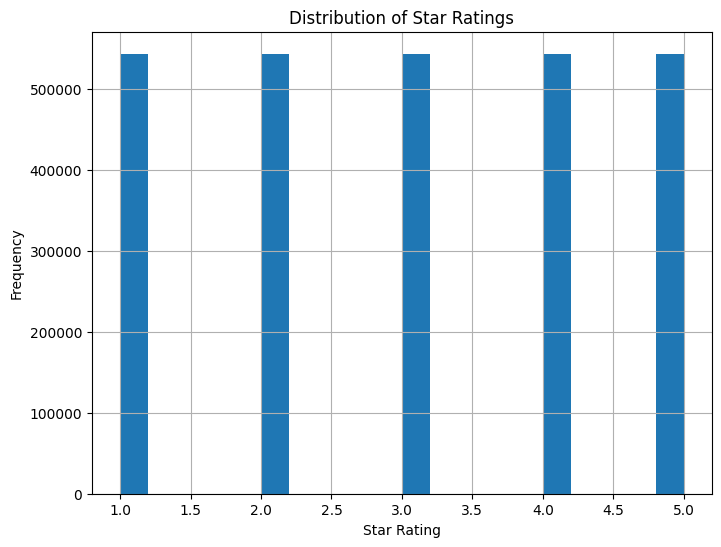

In [33]:
# Post-Undersampling Stars Distribution Analysis
u_df['stars_x'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Access the value of the 'text' column at index 1 in the DataFrame u_df
u_df['text'][1]

"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!"

In [38]:
# Save the DataFrame as a CSV file so we don't need to repeat the whole preprocessing again
u_df.to_csv('yelp_data.csv', index=False)

In [7]:
# Read the data from the CSV file 'yelp_data.csv' and create a DataFrame named new_df
new_df = pd.read_csv('yelp_data.csv')

In [8]:
# Display the first few rows of the DataFrame new_df
new_df.head()

,text,stars_x,categories,state,name
0,I always have a good experience at yolk! My fi...,5.0,"American (New), Cafes, Breakfast & Brunch, Ame...",IN,Yolk Iron Works
1,Jenny is a life saver! I came to her salon wit...,5.0,"Beauty & Spas, Hair Stylists, Hair Salons, Hai...",FL,Salon Siren
2,I ordered the spaghetti and meatballs for lunc...,5.0,"Restaurants, Italian",PA,Little Nonna's
3,The best new Mexican Tucson hands down!! Alway...,5.0,"Restaurants, American (Traditional), Diners, M...",AZ,Poco & Mom's
4,I went to NOLA during Mardi Gras season for va...,5.0,"Public Services & Government, Landmarks & Hist...",LA,French Quarter Phantoms


In [9]:
# Get the dimensions of the DataFrame new_df
new_df.shape

(2717820, 5)

In [10]:
# Get the data types of columns in the DataFrame new_df
new_df.dtypes

text           object
stars_x       float64
categories     object
state          object
name           object
dtype: object

### **Text Preprocessing**

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ndhu2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndhu2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ndhu2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Initialize WordNet Lemmatizer and stopwords

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs using regular expression
    text = re.sub(r'http\S+', '', text)
    
    # Remove non-alphanumeric characters, but keep numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply text preprocessing to the 'text' column
new_df['preprocessed_text'] = new_df['text'].apply(preprocess_text)

We decided to implement Lemmatization instead of Stemming as this one tends to give more accurate linguistic results, which can lead to a better model performance.

### **Feature Engineering**

In [13]:
# Create a new feature containing the length of the reviews
new_df['review_length'] = new_df['preprocessed_text'].apply(len)

In [28]:
# Display the first 20 rows of the DataFrame new_df
new_df.head(20)

,text,stars_x,categories,state,name,preprocessed_text,review_length
0,I always have a good experience at yolk! My fi...,5.0,"American (New), Cafes, Breakfast & Brunch, Ame...",IN,Yolk Iron Works,always good experience yolk first time dining ...,321
1,Jenny is a life saver! I came to her salon wit...,5.0,"Beauty & Spas, Hair Stylists, Hair Salons, Hai...",FL,Salon Siren,jenny life saver came salon hair crisis welcom...,190
2,I ordered the spaghetti and meatballs for lunc...,5.0,"Restaurants, Italian",PA,Little Nonna's,ordered spaghetti meatball lunch really tasty ...,110
3,The best new Mexican Tucson hands down!! Alway...,5.0,"Restaurants, American (Traditional), Diners, M...",AZ,Poco & Mom's,best new mexican tucson hand always prepared f...,182
4,I went to NOLA during Mardi Gras season for va...,5.0,"Public Services & Government, Landmarks & Hist...",LA,French Quarter Phantoms,went nola mardi gras season vacation bestie to...,1763
5,"food, service and atmosphere... all in one. we...",5.0,"American (New), Breakfast & Brunch, Sandwiches...",PA,Taylor's Cafe,food service atmosphere one breakfast delish r...,69
6,Sweet Charlie's is a special ice creamery wher...,5.0,"Food, Ice Cream & Frozen Yogurt, Desserts",PA,Sweet Charlie's,sweet charlies special ice creamery hand roll ...,307
7,Peter is a great guy and was very informative ...,5.0,"Automotive, Auto Repair, Auto Parts & Supplies...",CA,The Engine Company,peter great guy informative issue concerning v...,83
8,I had a great experience! If you know your an...,5.0,"Pets, Pet Services, Pet Sitting, Veterinarians",PA,Fairmount Animal Hospital,great experience know animal doesnt need vacci...,385
9,By far the best Italian experience I have had ...,5.0,"Restaurants, Food, Desserts, Bars, Italian, Ni...",DE,Vincente's Restaurant,far best italian experience long time went par...,275


In [16]:
# Save the DataFrame as a CSV file
new_df.to_csv('yelp_lemmatized_data1.csv', index=False)

In [34]:
# Create dataframe
df = pd.read_csv('yelp_lemmatized_data1.csv')

In [5]:
# Get the data types of columns in the DataFrame df
df.dtypes

text                  object
stars_x              float64
categories            object
state                 object
name                  object
preprocessed_text     object
review_length          int64
dtype: object

### **In-depth Exploratory Data Analysis**

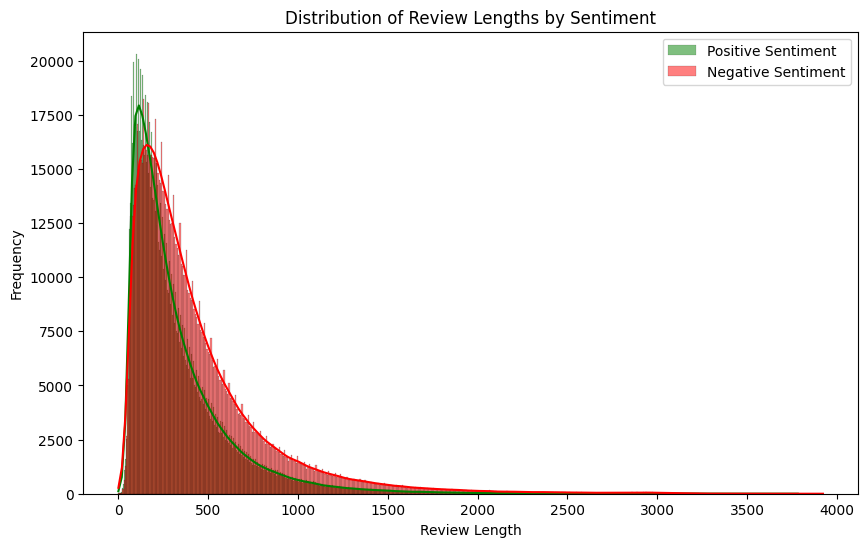

In [3]:
# Note: Still part of EDA (Exploratory Data Analysis)

import matplotlib.pyplot as plt
import seaborn as sns

# Filter positive and negative sentiment reviews
positive_reviews = df[df['stars_x'] >= 4]['review_length']
negative_reviews = df[df['stars_x'] <= 2]['review_length']

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram for positive sentiment reviews
sns.histplot(positive_reviews, color='green', kde=True, label='Positive Sentiment')

# Plot histogram for negative sentiment reviews
sns.histplot(negative_reviews, color='red', kde=True, label='Negative Sentiment')

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths by Sentiment')
plt.legend()

# Show plot
plt.show()


While negative reviews typically exhibit slightly longer lengths compared to positive ones, both types of reviews demonstrate similar distributions. Consequently, it's plausible that the "review_length" feature may not exert a significant influence on the model's performance.

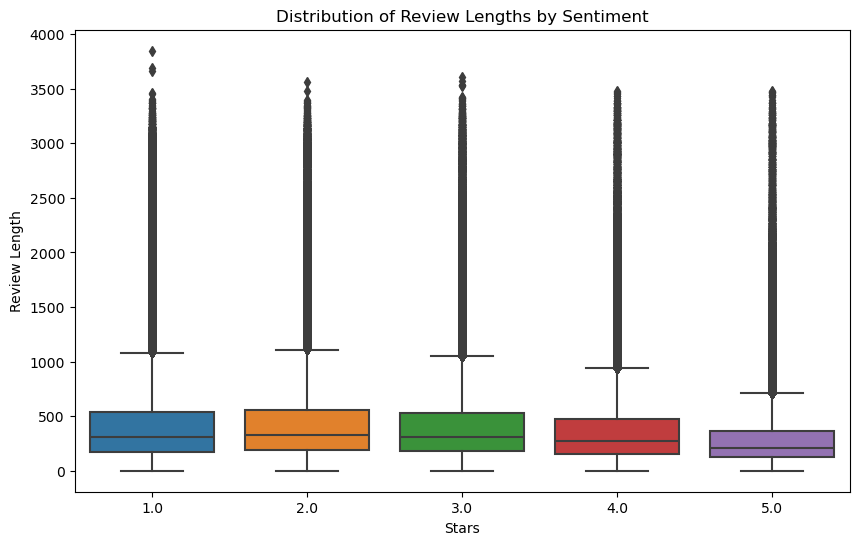

In [7]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a box plot of review lengths by sentiment
sns.boxplot(data=df, x='stars_x', y='review_length')

# Add labels and title
plt.xlabel('Stars')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Sentiment')

# Show plot
plt.show()

Here, we observe a substantial number of outliers in the data, raising concerns about the reliability of the "review_length" feature. Furthermore, we can validate the minor variations in length among the different classes.

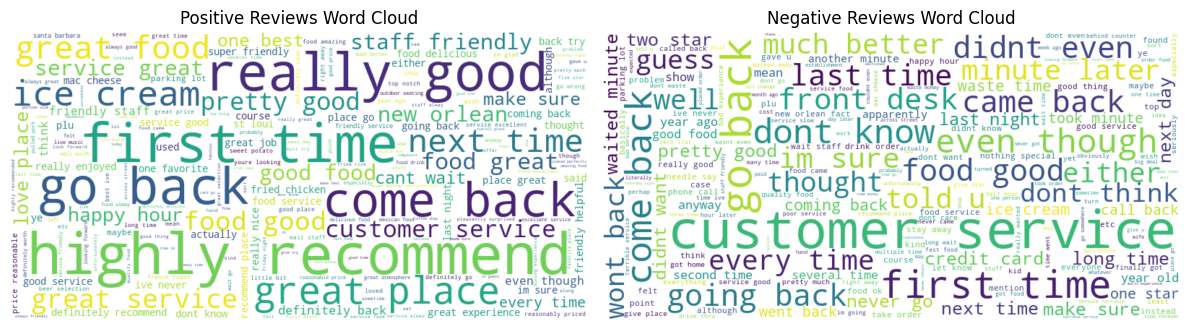

In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('yelp_lemmatized_data1.csv')

# Separate positive and negative reviews based on star ratings
positive_reviews = df[df['stars_x'] >= 4]['preprocessed_text'].str.cat(sep=' ')
negative_reviews = df[df['stars_x'] <= 2]['preprocessed_text'].str.cat(sep=' ')

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

Positive reviews seem more relatable to humans compared to negative reviews in the word cloud. Expressions like "highly recommended," "really good," and "pretty good" are commonly associated with positive sentiments. However, phrases such as "customer service," "food good," and "go back" don't quite fit the narrative of a negative review.

### **Model Training and Evaluation**

##### **Model 1: Using Bernoulli Naive Bayes**

In [5]:
# Drop rows with missing values in the 'preprocessed_text' column
df = df.dropna(subset=['preprocessed_text'])

We chose TF-IDF instead of other techniques, such as CountVectorizer, because it not only considers the frequency of the words in just one document but also the frequency of the words across the corpus (all the documents). This can give an additional element to the model, allowing it to learn more from the weight that each word has from a more general perspective.

In [6]:
# Remove the rows with 3-star ratings
df = df[df['stars_x'] != 3]

# Map ratings to binary labels (1 for good, 0 for bad)
df['sentiment'] = df['stars_x'].map({1: 0, 2: 0, 4: 1, 5: 1})

# Drop the 'stars_x' column if no longer needed
df.drop(columns=['stars_x'], inplace=True)

In [7]:
# Assign the preprocessed text data to variable X and sentiment labels to variable y
X = df['preprocessed_text']
y = df['sentiment']

In [8]:
# Importing train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the preprocessed text data (X) and corresponding sentiment labels (y) into training and testing sets
# test_size=0.2 specifies that 20% of the data should be used for testing, and the remaining 80% will be used for training
# random_state=42 provides a seed for random number generation to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=20)

# Fit and transform the preprocessed_text feature (X -> TF-IDF Matrix)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [10]:
import pickle

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [11]:
# X_train_tfidf.shape returns the dimensions of the TF-IDF transformed training data.

X_train_tfidf.shape

(1739391, 38600)

In [12]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train_tfidf, y_train)

BernoulliNB()

In [13]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8165358930016925
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80    217348
           1       0.77      0.90      0.83    217500

    accuracy                           0.82    434848
   macro avg       0.83      0.82      0.82    434848
weighted avg       0.83      0.82      0.82    434848



In [15]:
import pickle

# Save the trained model
with open('nb_bin_model1.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB

# Define a pipeline with TF-IDF vectorizer and Bernoulli Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', BernoulliNB())
])

# Define a range of min_df values to search
min_df = [1, 2, 4, 8, 12, 16, 20, 40, 60, 80]

# Define parameters grid for grid search
param_grid = {
    'tfidf__min_df': min_df,
}

# Perform grid search

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best min_df value
best_min_df = grid_search.best_params_['tfidf__min_df']
print("Best min_df:", best_min_df)

# Train the model with the best min_df value
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Best min_df: 4
Accuracy: 0.815430538659136


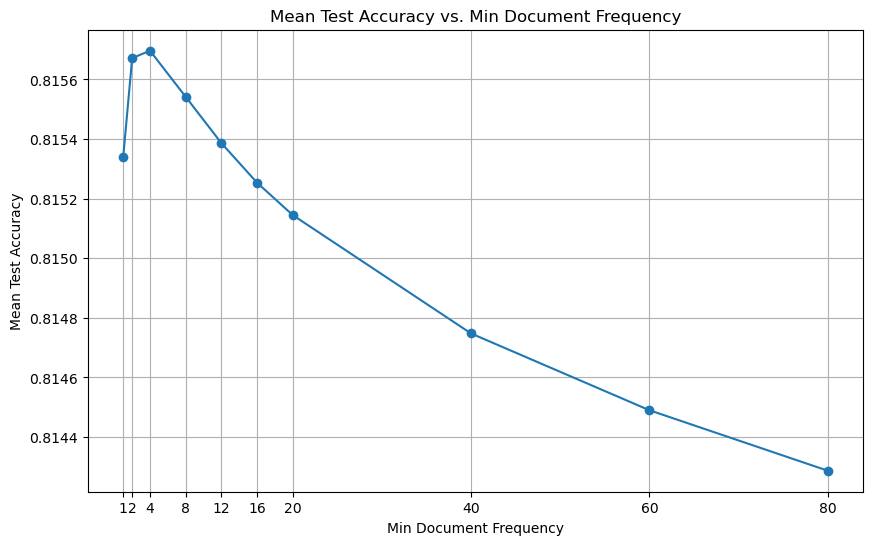

In [14]:
import matplotlib.pyplot as plt

# Extract grid search results
results = grid_search.cv_results_

# Extract mean test scores and corresponding max_features values
mean_test_scores = results['mean_test_score']
max_features_values = [params['tfidf__min_df'] for params in results['params']]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, mean_test_scores, marker='o')
plt.title('Mean Test Accuracy vs. Min Document Frequency')
plt.xlabel('Min Document Frequency')
plt.ylabel('Mean Test Accuracy')
plt.xticks(max_features_values)
plt.grid(True)
plt.show()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=80)

# Fit and transform the preprocessed_text feature (X -> TF-IDF Matrix)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
# Save the vectorizer
with open('tfidf_vect_80mindf.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [17]:
X_train_tfidf.shape

(1739391, 38600)

In [18]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train_tfidf, y_train)

BernoulliNB()

In [19]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8165358930016925
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80    217348
           1       0.77      0.90      0.83    217500

    accuracy                           0.82    434848
   macro avg       0.83      0.82      0.82    434848
weighted avg       0.83      0.82      0.82    434848



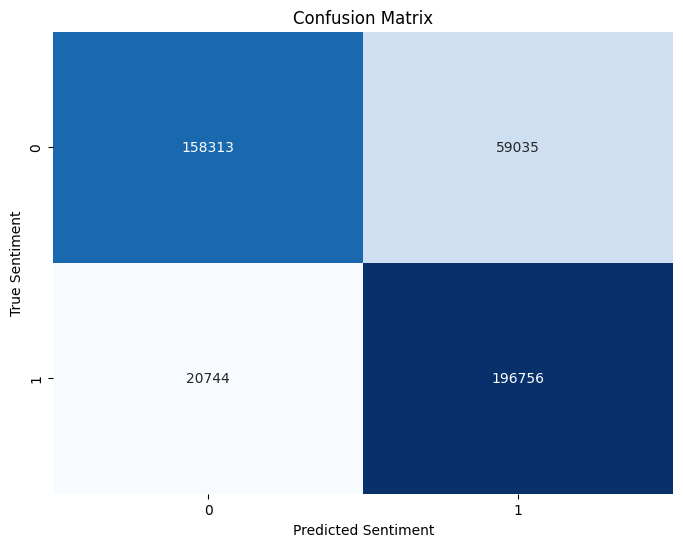

In [22]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()


In [23]:
import pickle

# Save the trained model
with open('nb_bin_model1.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

### **Real Time Prediction**

In [24]:
# Load the saved model
with open('nb_bin_model1.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)

In [25]:
# Load the saved vectorizer
with open('tfidf_vect_80mindf.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [26]:
# Prepare test data (example)
test_data = ["This restaurant exceeded my expectations. The food was amazing and the service was excellent!",
             "I had a terrible experience at this place. The food was cold and the staff was rude. I did not like it. It is bad. The worst place ever."]

# Preprocess test data if necessary (ensure it's in the same format as during training)

# Transform test data using the TF-IDF vectorizer
test_data_tfidf = tfidf_vectorizer.transform(test_data)

# Make predictions using the loaded model
predictions = loaded_classifier.predict(test_data_tfidf)

# Print predictions
for i, prediction in enumerate(predictions):
    print(f"Review {i+1}: {'Positive' if prediction == 1 else 'Negative'} sentiment")

Review 1: Positive sentiment
Review 2: Negative sentiment


### **Model Interpretation**

##### **Lime Explainer**

In [36]:
from lime.lime_text import LimeTextExplainer

# Load the preprocessed test data
df_test = pd.DataFrame({'preprocessed_text': X_test, 'sentiment': y_test})

# Load the TF-IDF vectorizer
with open('tfidf_vect_80mindf.pkl', 'rb') as file:
    loaded_tfidf_vectorizer = pickle.load(file)

# Load the trained model from the pickle file
with open('nb_bin_model1.pkl', 'rb') as file:
    nb_classifier = pickle.load(file)

# Define a function to classify text using the trained model
def nb_predict_proba(texts):
    vectors = loaded_tfidf_vectorizer.transform(texts)
    return nb_classifier.predict_proba(vectors)

# Initialize LIME TextExplainer
explainer = LimeTextExplainer(class_names=['negative', 'positive'])

# Choose a random instance from the test set for explanation
idx = np.random.randint(len(X_test))
text_instance = X_test.iloc[idx]
true_label = y_test.iloc[idx]

# Explain the prediction for the random instance
explanation = explainer.explain_instance(text_instance, nb_predict_proba, num_features=10)

# Print the explanation
print('Text instance:', text_instance)
print('True label:', true_label)
print('Predicted label:', nb_classifier.predict(loaded_tfidf_vectorizer.transform([text_instance]))[0])
explanation.show_in_notebook(text=text_instance)

Text instance: let start saying love qdoba however never ever make mistake returning awful location first noticed parking lot unusually dimly lit place 's open late second actual employee engage physical altercation parking lot entering building next employee moving slowly food line absolutely disgusting none even looked appetizing spillage everywhere food look fresh employee lack better word ghetto absolute trash disorganized inconsiderate 'm let service quality food cleanliness restaurant whoever running establishment ashamed
True label: 0
Predicted label: 0


In the LIME interpretation provided, we are examining a specific text instance, which appears to be a negative review of a restaurant experience. The true label indicates that the review was indeed negative. When the model makes a prediction for this text instance, it also predicts a negative sentiment, demonstrating consistency with the actual sentiment expressed in the review. The prediction probabilities show a high confidence in this prediction, with a probability close to 1.00 assigned to the negative class and near-zero probability assigned to the positive class.

LIME further analyzes the text to identify the most important features contributing to the model's prediction. In this case, words like "disgusting," "awful," "inconsiderate," "ghetto," and "trash" are highlighted as significant. These words carry strong negative connotations and likely reflect the negative aspects of the restaurant experience described in the review. Other words such as "mistake," "disorganized," and "altercation" also contribute to the negative sentiment, indicating various problems and issues mentioned in the review.

##### **SHAP Explainer**

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/1 [00:00<?, ?it/s]

Text instance: enjoy visit one bit went get blizzard three reese 's mini blizzard mint oreo blizzard well know back day used hand blizzard upside would n't able `` soupy '' mint oreo blizzard ... watery soupy milky whatever want call wife kid reese 's mini blizzard could turn upside n't ask extra topping long strand hair went sit search clean booth sit unfortunately one finally decided side son sat broke sitting close table basically leaning forward long story short give place two star staff friendly mint oreo soup might crap still good
True label: 0
Predicted label: 0


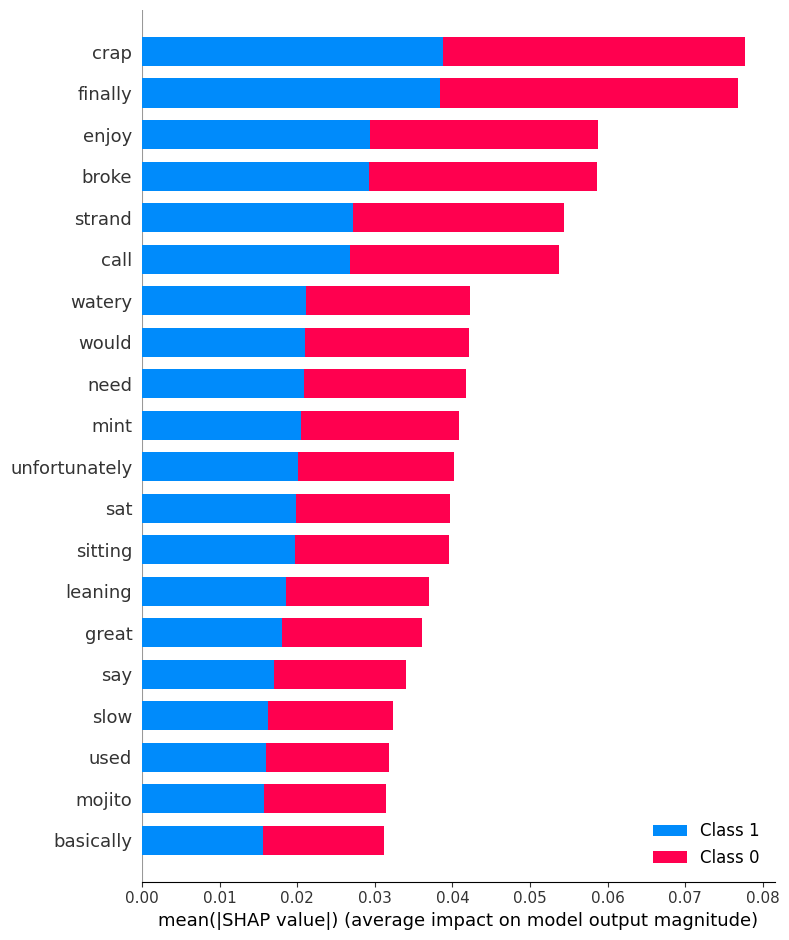

In [29]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
import shap

# Load the preprocessed test data
df_test = pd.DataFrame({'preprocessed_text': X_test, 'sentiment': y_test})

# Load the TF-IDF vectorizer
with open('tfidf_vect_80mindf.pkl', 'rb') as file:
    loaded_tfidf_vectorizer = pickle.load(file)

# Load the trained model from the pickle file
with open('nb_bin_model1.pkl', 'rb') as file:
    nb_classifier = pickle.load(file)

# Transform the test data
X_test_transformed = loaded_tfidf_vectorizer.transform(X_test)

# Initialize SHAP explainer
explainer = shap.KernelExplainer(nb_classifier.predict_proba, shap.sample(X_test_transformed, 100))

# Choose a random instance from the test set for explanation
idx = np.random.randint(len(X_test))
text_instance = X_test_transformed[idx]
true_label = y_test.iloc[idx]

# Explain the prediction for the random instance
shap_values = explainer.shap_values(text_instance)

# Print the explanation
print('Text instance:', X_test.iloc[idx])
print('True label:', true_label)
print('Predicted label:', nb_classifier.predict(X_test_transformed[idx])[0])
shap.summary_plot(shap_values, X_test_transformed, feature_names=loaded_tfidf_vectorizer.get_feature_names_out())

The SHAP (SHapley Additive exPlanations) Explainer is a technique used to interpret the predictions made by machine learning models at the individual instance level. In the provided text instance, the SHAP Explainer is applied to understand why the model predicted a certain sentiment for the given text.

In the SHAP graph, each word is represented along the y-axis, and its position indicates its contribution to the model's prediction. Words that appear higher on the y-axis have a greater impact on the model's output. The x-axis represents the average impact of the word on the model's prediction magnitude.

In the context of the provided example, words like "crap," "finally," and "enjoy" are plotted on the graph. These words are significant in understanding the sentiment expressed in the text. For instance, the word "crap" likely has a negative connotation, contributing to the negative sentiment prediction. Conversely, words like "enjoy" might indicate positive sentiment.

The graph also includes two classes: Class 0 and Class 1. Class 0 typically represents negative sentiment, while Class 1 represents positive sentiment. The position of each word on the graph relative to these classes indicates whether the word contributes positively or negatively to the sentiment prediction.